In [1]:
import pandas as pd
import numpy as np
from trading_rule import *
from trading_model import *
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2 as pg

# Data

In [2]:
from mt5_interface import User
from postgres_interface import DataBase
import json
from data_collection import PretradeDataUpdater

In [3]:
def read_json(filename):
  with open(filename) as f:
    j = json.load(f)
  return j

ac_info = read_json('config/mt5_account.json')['mt5-demo']
db_info = read_json('config/postgres_info.json')['pre-trade']

In [4]:
update = PretradeDataUpdater(ac_info,db_info)

Logged in as 80273160
Connected to pre-trade


In [6]:
update.set_universe()

In [7]:
df = pd.DataFrame()
df["symbol"] = ["AUDUSD", "EURUSD", "GBPUSD", "NZDUSD", "USDCHF", "USDCAD", "USDJPY"]
df["description"] = [
    "Australian Dollar (in US Dollar)",
    "Euro (in US Dollar)",
    "UK Pound (in US Dollar)",
    "New Zealand Dollar (in US Dollar)",
    "US Dollar (in Swiss Franc)",
    "US dollar (in Canadian Dollar)",
    "US dollar (in Japanese Yen)",
]
df["asset_class"] = "currency"
df["nominal_currency"] = ["USD", "USD", "USD", "USD", "CHF", "CAD", "JPY"]
df["id"] = range(len(df))
df = df[["id", "symbol", "asset_class", "nominal_currency", "description"]]
df

id  symbol asset_class nominal_currency                        description
0   0  AUDUSD    currency              USD   Australian Dollar (in US Dollar)
1   1  EURUSD    currency              USD                Euro (in US Dollar)
2   2  GBPUSD    currency              USD            UK Pound (in US Dollar)
3   3  NZDUSD    currency              USD  New Zealand Dollar (in US Dollar)
4   4  USDCHF    currency              CHF         US Dollar (in Swiss Franc)
5   5  USDCAD    currency              CAD     US dollar (in Canadian Dollar)
6   6  USDJPY    currency              JPY        US dollar (in Japanese Yen)

In [14]:
update.init_bars()

Getting 1h bars of AUDUSD from 2013-04-12 18:28:04.429688+00:00 to 2024-03-25 18:28:04.429688+00:00
Getting 1h bars of EURUSD from 2013-04-12 18:28:15.419552+00:00 to 2024-03-25 18:28:15.419552+00:00
Getting 1h bars of GBPUSD from 2013-04-12 18:28:26.085680+00:00 to 2024-03-25 18:28:26.085680+00:00
Getting 1h bars of NZDUSD from 2013-04-12 18:28:36.752572+00:00 to 2024-03-25 18:28:36.752572+00:00
Getting 1h bars of USDCHF from 2013-04-12 18:28:47.037145+00:00 to 2024-03-25 18:28:47.037145+00:00
Getting 1h bars of USDCAD from 2013-04-12 18:29:14.498178+00:00 to 2024-03-25 18:29:14.498178+00:00
Getting 1h bars of USDJPY from 2013-04-12 18:29:25.301179+00:00 to 2024-03-25 18:29:25.301179+00:00


In [8]:
update.update_bars()

Getting 1h bars of AUDUSD from 2024-03-25 17:00:00+00:00 to 2024-04-18 10:26:02.402753+00:00
2024-03-25 17:00:00
Getting 1h bars of EURUSD from 2024-03-25 17:00:00+00:00 to 2024-04-18 10:26:02.755654+00:00
2024-03-25 17:00:00
Getting 1h bars of GBPUSD from 2024-03-25 16:00:00+00:00 to 2024-04-18 10:26:03.067927+00:00
2024-03-25 16:00:00
Getting 1h bars of NZDUSD from 2024-03-25 17:00:00+00:00 to 2024-04-18 10:26:03.380927+00:00
2024-03-25 17:00:00
Getting 1h bars of USDCHF from 2024-03-25 17:00:00+00:00 to 2024-04-18 10:26:03.723242+00:00
2024-03-25 17:00:00
Getting 1h bars of USDCAD from 2024-03-25 16:00:00+00:00 to 2024-04-18 10:26:08.911625+00:00
2024-03-25 16:00:00
Getting 1h bars of USDJPY from 2024-03-25 16:00:00+00:00 to 2024-04-18 10:26:09.287548+00:00
2024-03-25 16:00:00


In [9]:
update.db.read_all('bars').tail(10)

id  symbol                time     open     high  \
478053  2007-20240418010000  USDJPY 2024-04-18 01:00:00  154.321  154.328   
478054  2007-20240418020000  USDJPY 2024-04-18 02:00:00  154.273  154.366   
478055  2007-20240418030000  USDJPY 2024-04-18 03:00:00  154.341  154.408   
478056  2007-20240418040000  USDJPY 2024-04-18 04:00:00  154.280  154.301   
478057  2007-20240418050000  USDJPY 2024-04-18 05:00:00  154.216  154.247   
478058  2007-20240418060000  USDJPY 2024-04-18 06:00:00  154.129  154.317   
478059  2007-20240418070000  USDJPY 2024-04-18 07:00:00  154.236  154.313   
478060  2007-20240418080000  USDJPY 2024-04-18 08:00:00  154.292  154.354   
478061  2007-20240418090000  USDJPY 2024-04-18 09:00:00  154.283  154.305   
478062  2007-20240418100000  USDJPY 2024-04-18 10:00:00  154.275  154.324   

            low    close  spread  tick_volume  real_volume  
478053  154.249  154.276       3          856            0  
478054  154.179  154.342       3         1388            0  
478055  154.249  154.281       1         2268            0  
478056  154.166  154.216       2         2184            0  
478057  153.957  154.129       1         3158            0  
478058  154.110  154.236       0         1696            0  
478059  154.236  154.292       1         1073            0  
478060  154.254  154.283       0         1564            0  
478061  154.062  154.275       0         2649            0  
478062  154.247  154.272       1          766            0

In [10]:
update.close()

In [12]:
update.user.get_bars('AUDUSD','1h',period_days=100)

Getting 1h bars of AUDUSD from 2023-12-16 09:57:54.734045+00:00 to 2024-03-25 09:57:54.734045+00:00


time     open     high      low    close  tick_volume  \
0    2023-12-18 00:00:00  0.66970  0.67030  0.66947  0.66981         1578   
1    2023-12-18 01:00:00  0.66985  0.67031  0.66929  0.66983         1599   
2    2023-12-18 02:00:00  0.66982  0.67090  0.66978  0.67079         2536   
3    2023-12-18 03:00:00  0.67079  0.67109  0.66928  0.66994         3190   
4    2023-12-18 04:00:00  0.66994  0.67094  0.66994  0.67061         2271   
...                  ...      ...      ...      ...      ...          ...   
1638 2024-03-25 05:00:00  0.65408  0.65409  0.65252  0.65270         1167   
1639 2024-03-25 06:00:00  0.65270  0.65298  0.65250  0.65265          753   
1640 2024-03-25 07:00:00  0.65265  0.65276  0.65231  0.65254         1040   
1641 2024-03-25 08:00:00  0.65255  0.65257  0.65202  0.65217         1328   
1642 2024-03-25 09:00:00  0.65217  0.65279  0.65165  0.65216         1517   

      spread  real_volume  time_value  
0         14            0  1702857600  
1          4            0  1702861200  
2          4            0  1702864800  
3          4            0  1702868400  
4          0            0  1702872000  
...      ...          ...         ...  
1638       2            0  1711342800  
1639       3            0  1711346400  
1640       1            0  1711350000  
1641       1            0  1711353600  
1642       2            0  1711357200  

[1643 rows x 9 columns]

In [ ]:
symbols = ['AUDUSD','EURUSD','GBPUSD','NZDUSD','USDCAD','USDJPY']
for symbol in symbols:
  df = ac.get_bars(symbol,'1h',period_days=4000)
  db.create_table_from_df(table_name=symbol,df=df)
db.commit()
db.close()

In [4]:
ac = User().login_by_dict(ac_info)

Logged in as 80273160


In [5]:
ac.get_bars('XAUUSD','1h',period_days=4000)

Getting 1h bars of XAUUSD from 2013-04-12 07:30:46.262861+00:00 to 2024-03-25 07:30:46.262861+00:00


time     open     high      low    close  tick_volume  \
0     2013-04-12 08:00:00  1560.99  1564.71  1560.80  1563.53         3806   
1     2013-04-12 09:00:00  1563.53  1563.63  1560.80  1561.55         4039   
2     2013-04-12 10:00:00  1561.59  1561.63  1556.94  1557.04         6341   
3     2013-04-12 11:00:00  1557.04  1558.05  1556.88  1557.20         4950   
4     2013-04-12 12:00:00  1557.19  1557.19  1545.10  1545.63        13158   
...                   ...      ...      ...      ...      ...          ...   
64408 2024-03-25 03:00:00  2165.49  2176.90  2164.03  2175.14         5505   
64409 2024-03-25 04:00:00  2175.16  2178.29  2173.77  2175.05         3268   
64410 2024-03-25 05:00:00  2175.05  2175.09  2170.03  2170.60         3001   
64411 2024-03-25 06:00:00  2170.60  2171.56  2169.13  2169.41         1832   
64412 2024-03-25 07:00:00  2169.41  2171.04  2167.75  2169.79         2434   

       spread  real_volume  
0          23       946000  
1          20      1096700  
2          21      1685990  
3          18      1307760  
4          17      3626680  
...       ...          ...  
64408       5            0  
64409       5            0  
64410       5            0  
64411       7            0  
64412       5            0  

[64413 rows x 8 columns]

In [12]:
db = DataBase()
db.connect_by_dict(db_info)

Connected to bars


In [13]:
symbols = ['AUDUSD','EURUSD','GBPUSD','NZDUSD','USDCAD','USDJPY']
for symbol in symbols:
  df = ac.get_bars(symbol,'1h',period_days=4000)
  db.create_table_from_df(table_name=symbol,df=df)
db.commit()
db.close()

Getting 1h bars of AUDUSD from 2013-04-09 14:29:25.679662+00:00 to 2024-03-22 14:29:25.679662+00:00
Getting 1h bars of EURUSD from 2013-04-09 14:29:36.198662+00:00 to 2024-03-22 14:29:36.198662+00:00
Getting 1h bars of GBPUSD from 2013-04-09 14:29:46.394661+00:00 to 2024-03-22 14:29:46.394661+00:00
Getting 1h bars of NZDUSD from 2013-04-09 14:29:56.607660+00:00 to 2024-03-22 14:29:56.607660+00:00
Getting 1h bars of USDCAD from 2013-04-09 14:30:06.861662+00:00 to 2024-03-22 14:30:06.861662+00:00
Getting 1h bars of USDJPY from 2013-04-09 14:30:17.188661+00:00 to 2024-03-22 14:30:17.188661+00:00


In [11]:
db.close()

[('time',),
 ('open',),
 ('high',),
 ('low',),
 ('close',),
 ('tick_volume',),
 ('spread',),
 ('real_volume',),
 ('id',)]

In [10]:
db.commit()
db.close()

In [7]:
df.dtypes

time           datetime64[ns]
open                  float64
high                  float64
low                   float64
close                 float64
tick_volume            uint64
spread                  int32
real_volume            uint64
id                     object
dtype: object

In [ ]:
symbols = ['AUDUSD','EURUSD','GBPUSD','NZDUSD','USDCAD','USDJPY']
for symbol in symbols:
  df = ac.get_bars(symbol,'1h',period_days=4000)
  

In [6]:
db.read_tail('audusd',10)

UndefinedColumn: column "createddatetime" does not exist
LINE 2: SELECT * FROM audusd ORDER BY CreatedDateTime DESC LIMIT 10;
                                      ^


In [7]:
db.close()

In [357]:
data_path = f'Data/Forex/EURUSD.csv'
data = pd.read_csv(data_path)

In [358]:
data.set_index('Datetime',inplace=True)
data.sort_index(ascending=True,inplace=True)

In [359]:
data.index = pd.DatetimeIndex(data.index)

# Models

In [15]:
signal = []
train_size = 12000
start = 1000
for i in range(0+start,24+start):
  train_set = data.iloc[i:train_size+i]
  
  model = ShortTermBollingerBand(train_set.Open,
                         train_set.High,
                         train_set.Low,
                         train_set.Close,
                         train_set.Volume)
  signal.append(model.signal)

<Axes: xlabel='Datetime'>

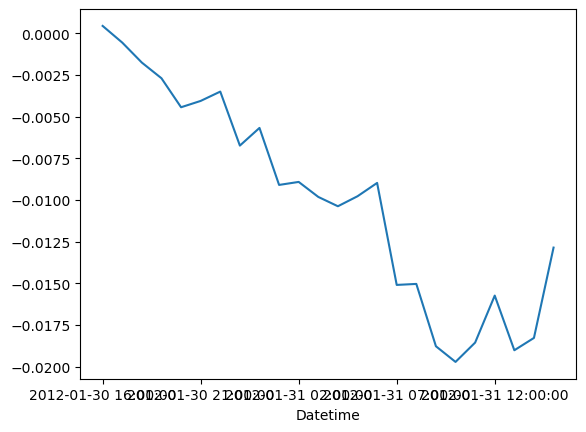

In [16]:
pos = pd.Series(signal,index=data.index[train_size+start:train_size+start+24])
logret = data.Close.diff().shift(-1)
pnl = pos*logret
pnl.dropna().cumsum().plot()


# Rules

In [316]:
def store_rule(rule_obj:TradingRule,signals,bisignals,pnls):
  signals.append(rule_obj.signal)
  bisignals.append(rule_obj.bisignal)
  pnls.append(rule_obj.pnl)

In [317]:
s = data.Close.iloc[0]
sigma = data.Close.std()
t = len(data)

In [318]:
def get_rand_data(s,sigma,t):
  rand_r = np.random.standard_normal(size=t) * sigma
  rand_r[0] = 1
  rand_s = pd.Series(rand_r.cumsum() * s,index=data.index)
  
  rand_data = pd.DataFrame()
  rand_data['Open'] = rand_s
  rand_data['High'] = rand_s
  rand_data['Low'] = rand_s
  rand_data['Close'] = rand_s
  rand_data['Volume'] = 0
  
  return rand_data

In [360]:
def get_rand_signal(data):
  from itertools import product
  signals = []
  bisignals = []
  pnls = []

  lookbacks = [12*2**i for i in range(6)]

  for lookback in lookbacks:
    for thr in [0.85,0.95,0.99]:
      store_rule(ChannelBreakout(lookback,thr,
                      data.Open,data.High,data.Low,data.Close,data.Volume),
                signals,bisignals,pnls)
      store_rule(SkewPremium(lookback,thr,
                      data.Open,data.High,data.Low,data.Close,data.Volume),
                signals,bisignals,pnls)
      store_rule(KurtReversal(lookback,thr,
                      data.Open,data.High,data.Low,data.Close,data.Volume),
                signals,bisignals,pnls)
    for thr in [1,2,3]:
      store_rule(EWMAC(lookback,thr,
                      data.Open,data.High,data.Low,data.Close,data.Volume),
                signals,bisignals,pnls)
      store_rule(BollingerBand(lookback,thr,
                      data.Open,data.High,data.Low,data.Close,data.Volume),
                signals,bisignals,pnls)
      store_rule(NDayMomentum(lookback,thr,
                      data.Open,data.High,data.Low,data.Close,data.Volume),
                signals,bisignals,pnls)
      
  signals_df = pd.concat(signals,axis=1).dropna()
  bisignals_df = pd.concat(bisignals,axis=1).dropna()
  pnls_df = pd.concat(pnls,axis=1).dropna()
  
  return signals_df,bisignals_df,pnls_df

In [388]:
from itertools import product
signals = []
bisignals = []
pnls = []

lookbacks = [12*2**i for i in range(6)]

data = data.ffill()

for lookback in lookbacks:
  for thr in [0.85,0.95,0.99]:
    store_rule(ChannelBreakout(lookback,thr,
                    data.Open,data.High,data.Low,data.Close,data.Volume),
              signals,bisignals,pnls)
    store_rule(SkewPremium(lookback,thr,
                    data.Open,data.High,data.Low,data.Close,data.Volume),
              signals,bisignals,pnls)
    store_rule(KurtReversal(lookback,thr,
                    data.Open,data.High,data.Low,data.Close,data.Volume),
              signals,bisignals,pnls)
  for thr in [1,2,3]:
    store_rule(EWMAC(lookback,thr,
                    data.Open,data.High,data.Low,data.Close,data.Volume),
              signals,bisignals,pnls)
    store_rule(BollingerBand(lookback,thr,
                    data.Open,data.High,data.Low,data.Close,data.Volume),
              signals,bisignals,pnls)
    store_rule(NDayMomentum(lookback,thr,
                    data.Open,data.High,data.Low,data.Close,data.Volume),
              signals,bisignals,pnls)
  
signals_df = pd.concat(signals,axis=1).dropna()
bisignals_df = pd.concat(bisignals,axis=1).dropna()
pnls_df = pd.concat(pnls,axis=1).dropna()

In [343]:
def sr(pnl):
  pnl = pnl.fillna(0)
  mu = pnl.mean()
  sig = pnl.std()
  n_per_year = 24*252
  sr = mu/sig*n_per_year**0.5
  return sr

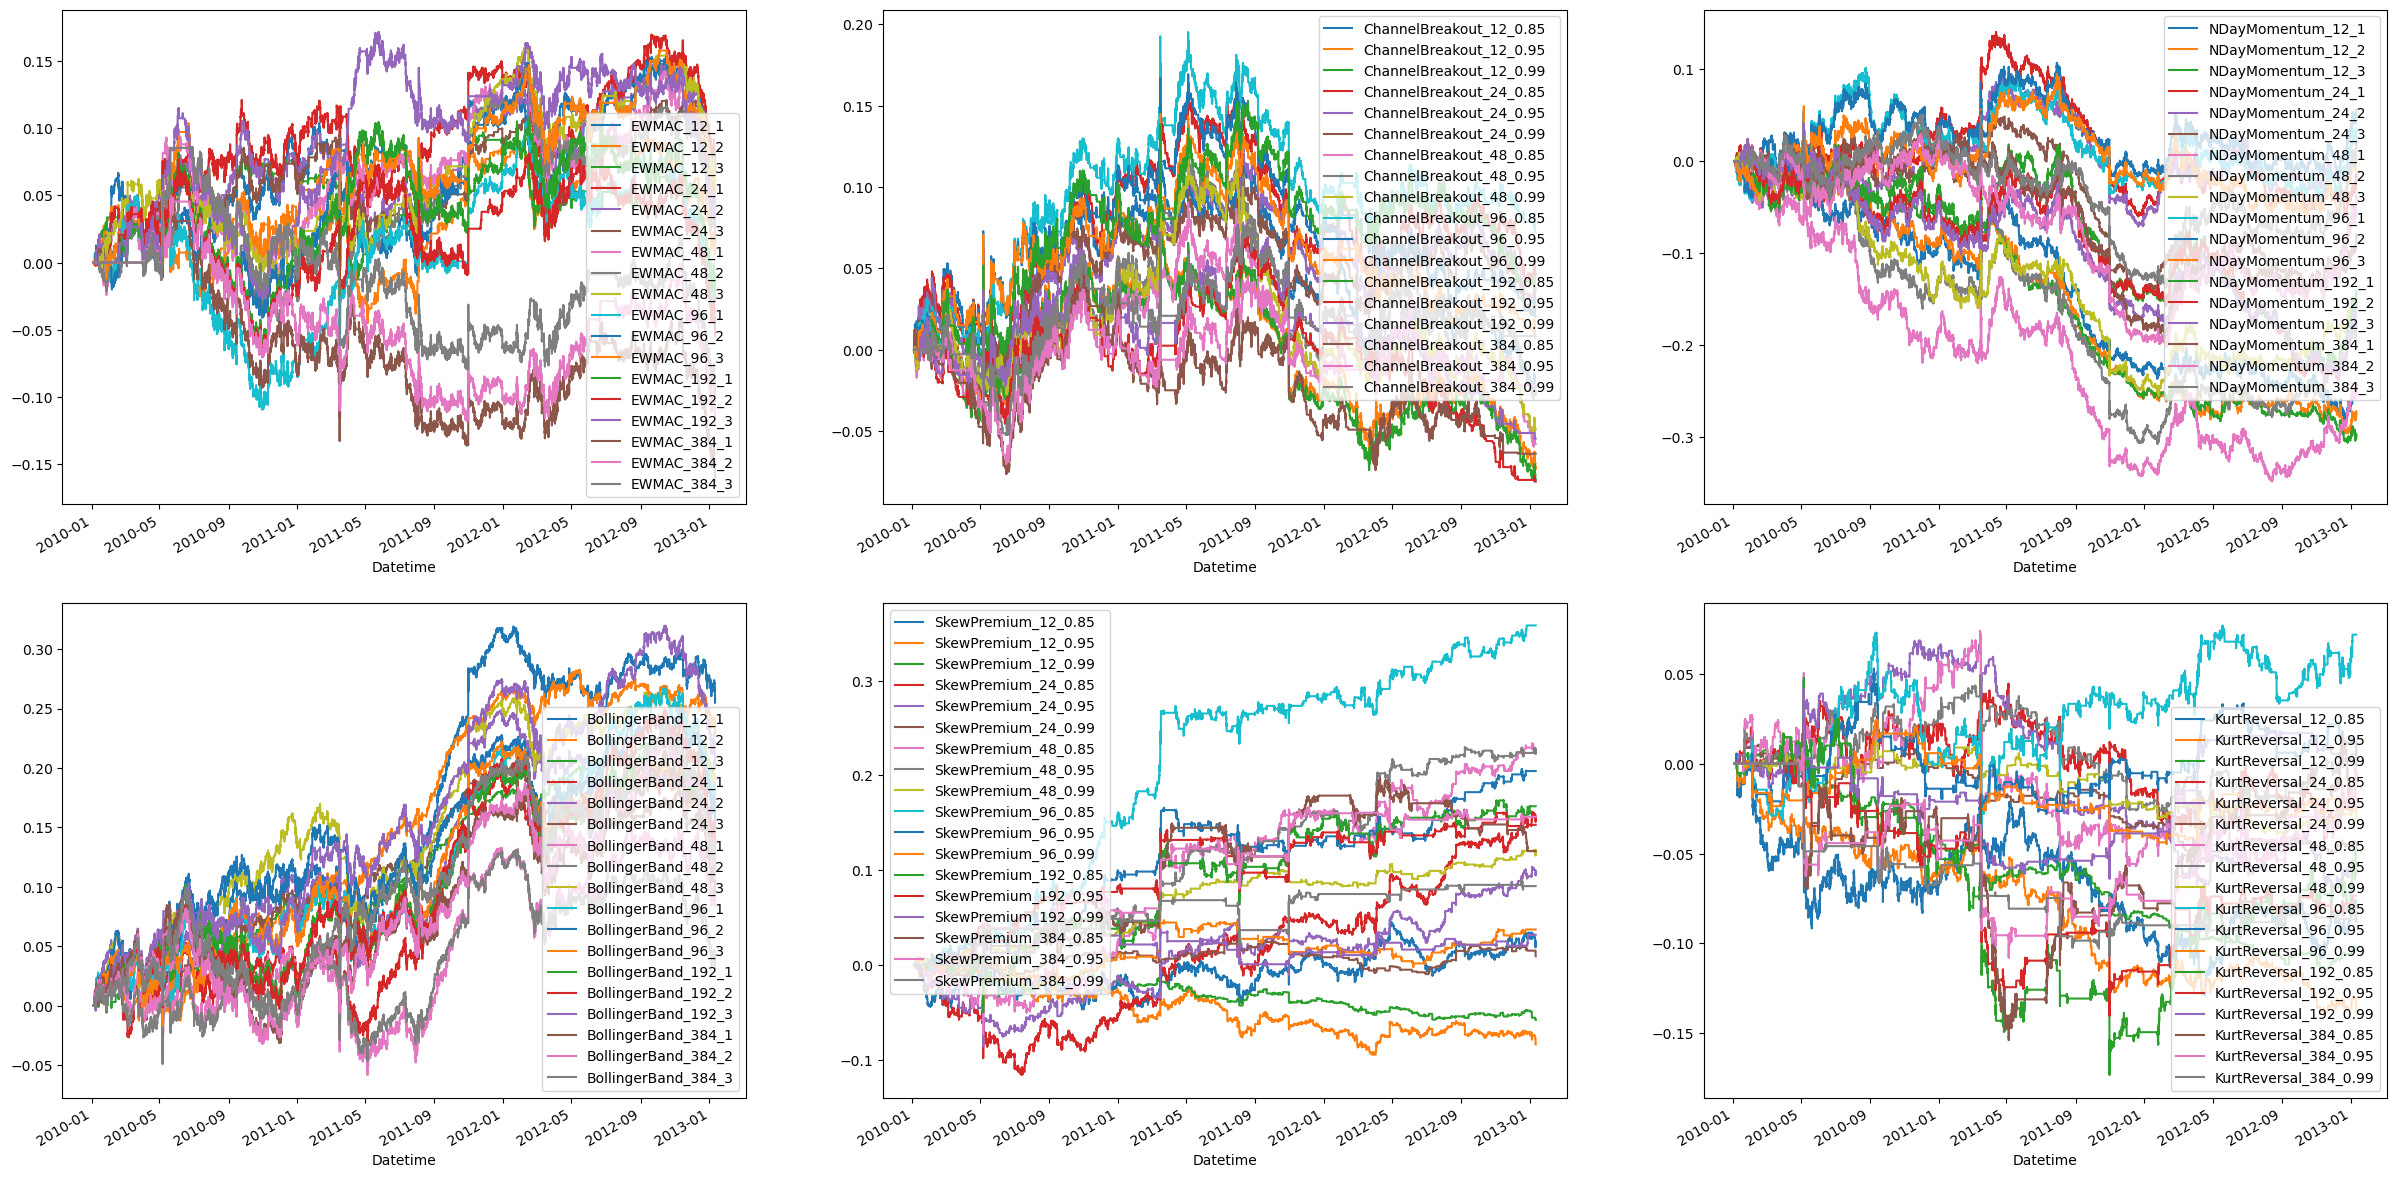

In [344]:
strats = ['EWMAC','ChannelBreakout','NDayMomentum','BollingerBand','SkewPremium','KurtReversal']

fig,axes = plt.subplots(2,3,figsize=(30,16))
for i,strat in enumerate(strats):
  cols = pnls_df.columns[pnls_df.columns.str.match(f'{strat}_*')]
  ax = axes[i//3,i%3]
  pnls_df.loc[:,cols].cumsum().plot(ax=ax)

# KMean

In [324]:
from sklearn.cluster import KMeans

In [222]:
rand_data = get_rand_data(s,sigma,t)
signals_df,bisignals_df,pnls_df = get_rand_signal(rand_data)

c:\ProgramData\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [238]:
def get_port(bisignals_df):
  n_clusters = 12
  kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto")
  kmeans.fit(bisignals_df.corr())
  groups = kmeans.labels_

  port = {i: list() for i in range(n_clusters)}
  for i,group in enumerate(groups):
    port[group].append(pnls_df.columns[i])
  return port

In [239]:
rand_port = get_port(bisignals_df)

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [23]:
n_clusters = 12
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto")
kmeans.fit(pnls_df.corr())
groups = kmeans.labels_

port = {i: list() for i in range(n_clusters)}
for i,group in enumerate(groups):
  port[group].append(pnls_df.columns[i])

c:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


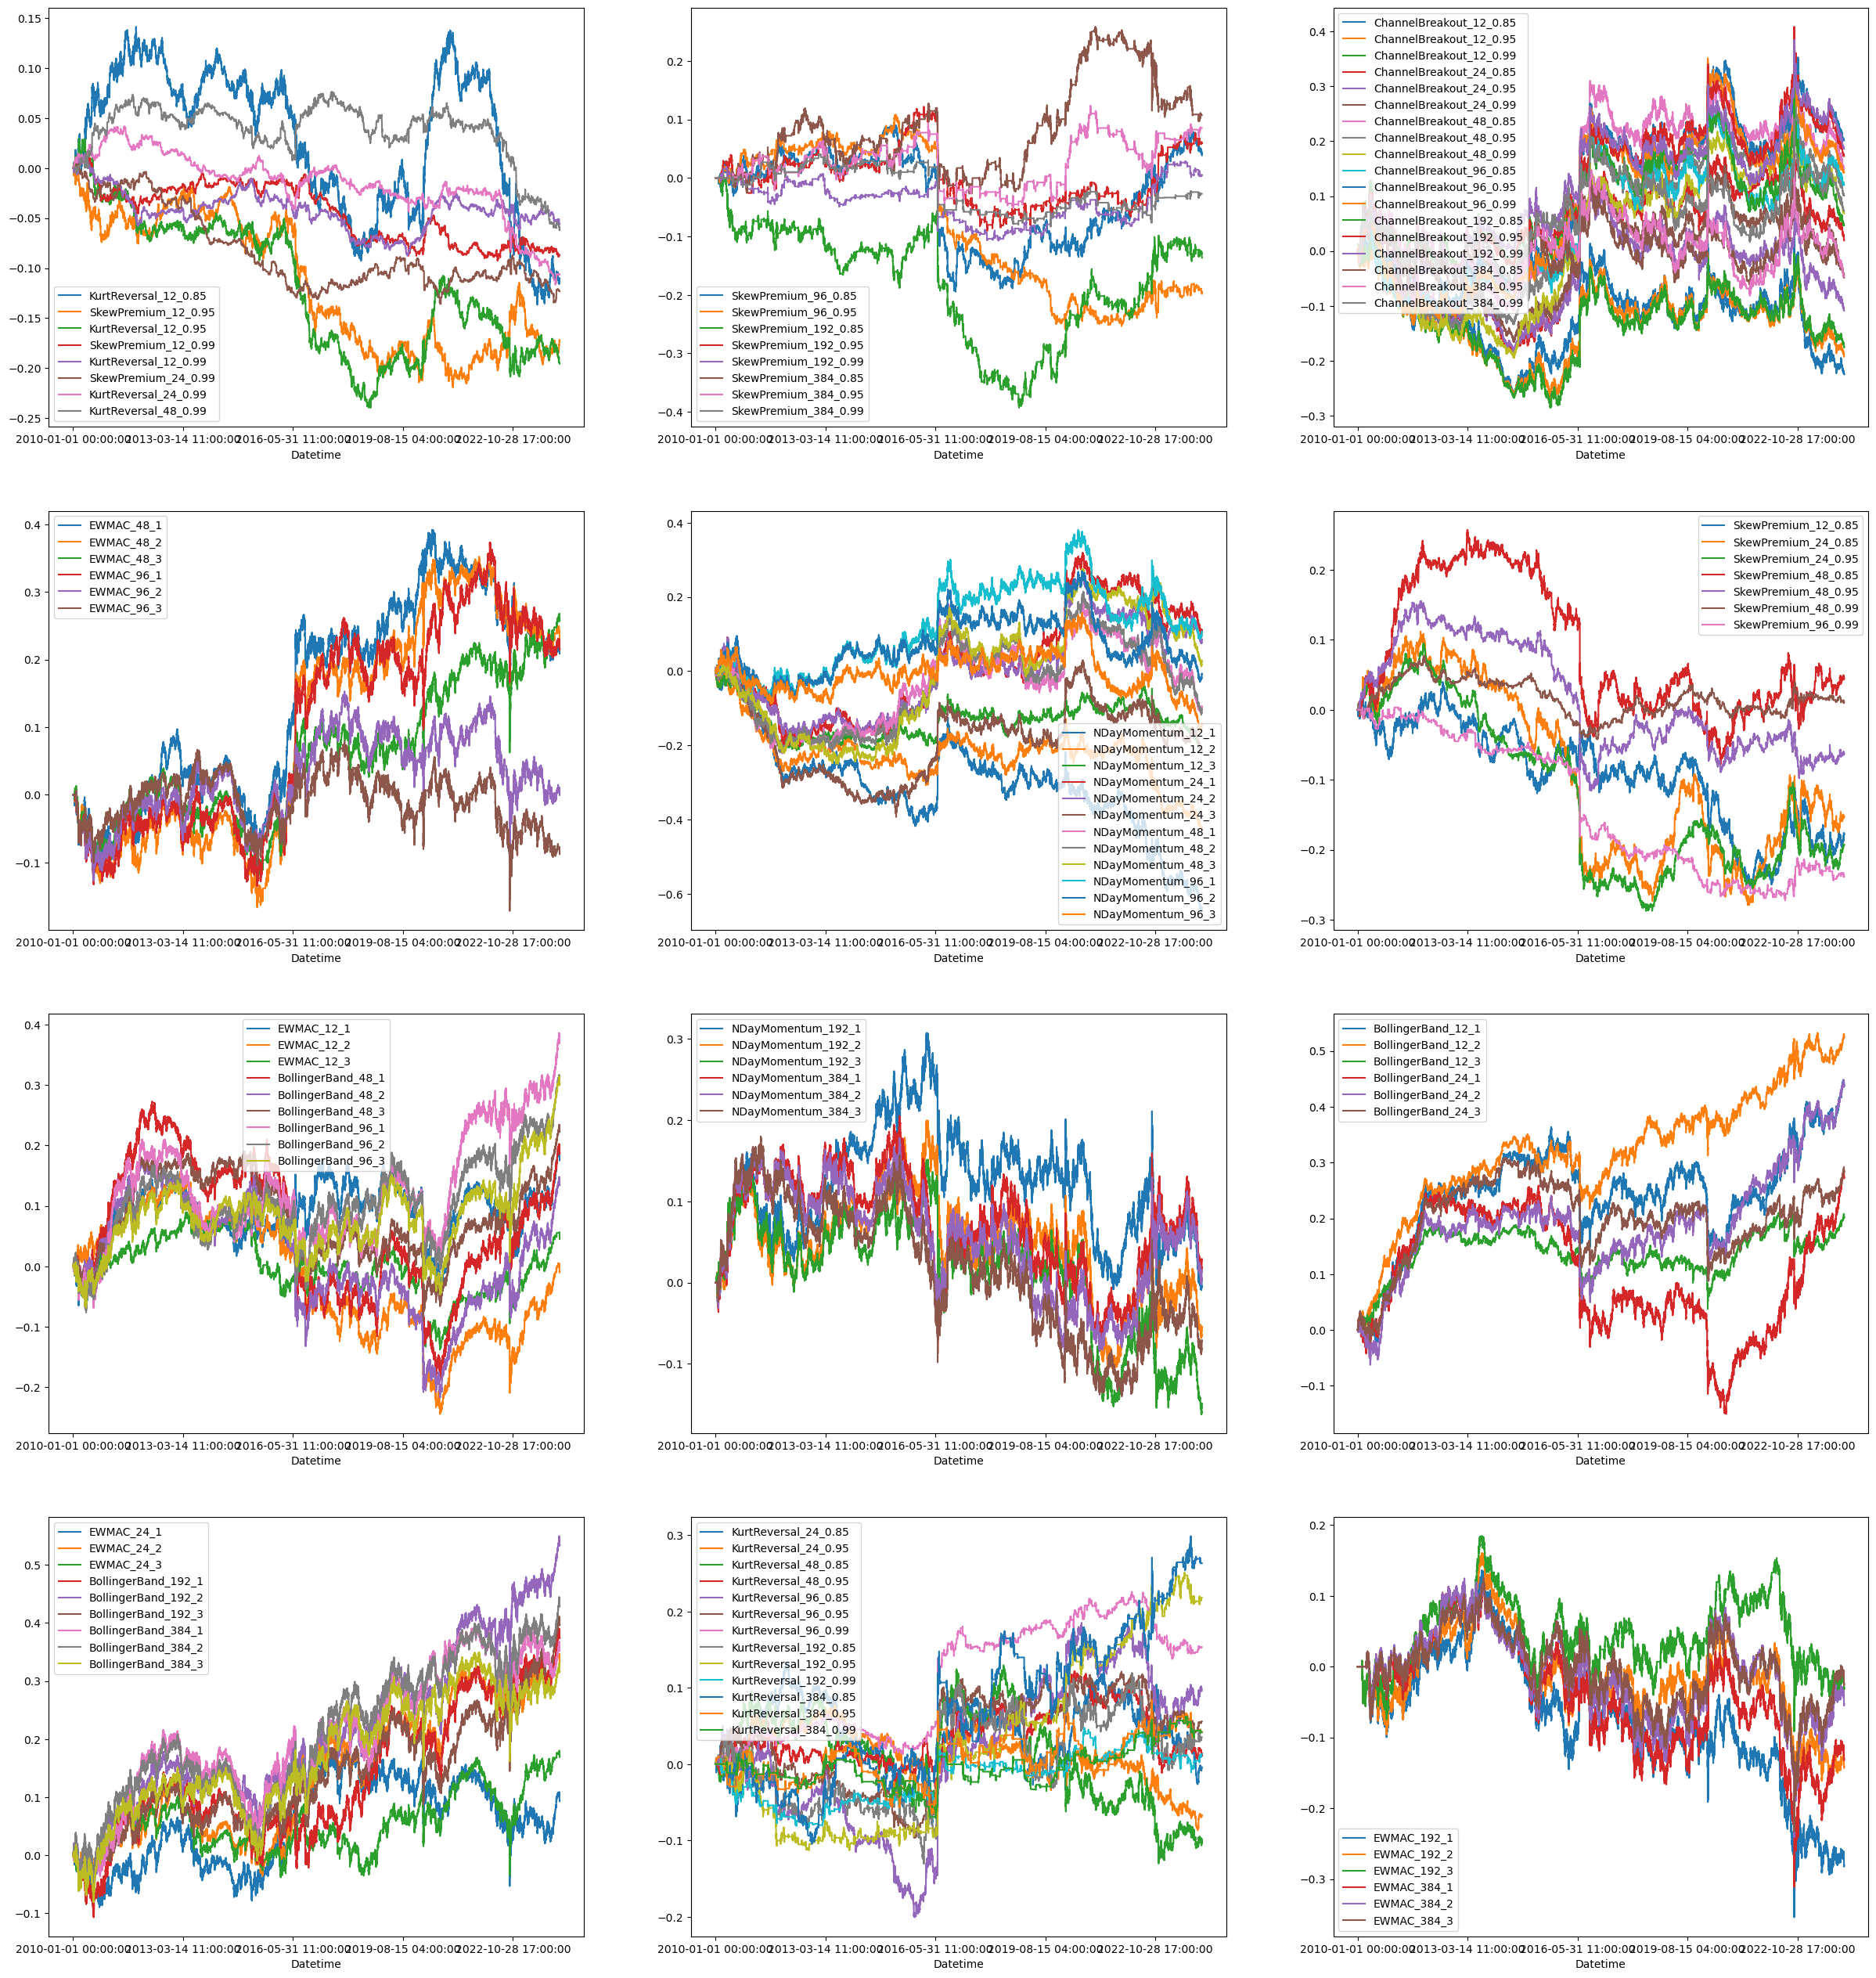

In [24]:
fig,axes = plt.subplots(4,3,figsize=(30,32))
for i,s_list in (port.items()):
  ax = axes[i//3,i%3]
  pnls_df.loc[:,s_list].cumsum().plot(ax=ax)

In [ ]:
import pickle


def save_pickle(obj, filename):
    with open(f"{filename}.pickle", "wb") as handle:
        pickle.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)
def load_pickle(filename):
    with open(f"{filename}.pickle", "rb") as handle:
        obj = pickle.load(handle)
        return obj

In [ ]:
save_pickle(port,'strat_cluster')

In [ ]:
port = load_pickle('strat_cluster')

# Labelling

In [361]:
def get_label(prc, tp, sl, hd):
    log_prc = np.log(prc)
    log_ret = log_prc.diff().shift(-1)
    ew_vol = np.sqrt((log_ret**2).ewm(40, min_periods=40).mean())

    # tp = window**0.5
    # sl = window**0.5
    # hd = window

    # print(tp , sl , hd)
    label = []

    for i, ret in log_ret.items():
        up_bar = ew_vol.loc[i] * tp
        low_bar = ew_vol.loc[i] * -sl
        time_bar = hd

        future_ret = log_ret.loc[i:]
        cum_ret = ret
        cum_day = 1
        while True:
            if cum_ret >= up_bar:
                label.append(+2)
                break
            elif cum_ret <= low_bar:
                label.append(np.sign(cum_ret))
                break
            elif cum_day >= time_bar or cum_day >= future_ret.shape[0]:
                label.append(-2)
                break

            ret = future_ret.iloc[cum_day]
            cum_day += 1
            cum_ret += ret

    label = pd.Series(label, index=log_ret.index, name="LABEL")
    return label

In [390]:
tp,sl,hd = 5,5,24
label = get_label(data.Close,tp,sl,hd)

In [391]:
label.index = pd.DatetimeIndex(label.index)

In [392]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from statsmodels.api import OLS

from numpy.lib.stride_tricks import sliding_window_view

In [393]:
def get_pred(dataset):
    #dataset = dataset[0,0]
    #print(dataset)
    train_set = dataset[:, :-1-24]
    test_set = dataset[:, -1]
    train_y, train_x = train_set[0], train_set[1:]
    test_y, test_x = test_set[0], test_set[1:]
    #model = RandomForestClassifier(n_estimators=500, max_depth=3, random_state=300300)
    model = GaussianNB()
    #model = LogisticRegression(penalty='l2',random_state=300300)
    model.fit(y=train_y, X=train_x.T)
    pred = model.predict(test_x.reshape(1, -1))[0]
    return pred

In [394]:
pred_ds = pd.DataFrame()
for i in range(12):
  p = pd.concat([label,bisignals_df.loc[:,rand_port[i]]],axis=1).dropna()
  lookback = 9600

  # create rolling datasets for each day
  rolling = sliding_window_view(p,axis=0, window_shape=lookback+1)
  # random forest prediction
  #pred = np.apply_over_axis(get_pred, axis=1, arr=rolling)
  size = 70000
  pred = [get_pred(dataset) for dataset in rolling[:size]]
  pred_d = pd.Series(pred,p.index[lookback:lookback+size])
  pred_ds[i] = pred_d

<Axes: >

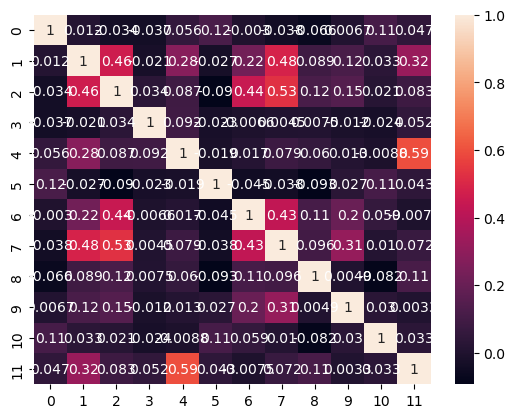

In [395]:
import seaborn as sns
sns.heatmap(pred_ds.corr(),annot=True)

In [ ]:
for k,p in port.items():
  print(f'{k}:{p}') 

0:['KurtReversal_12_0.85', 'SkewPremium_12_0.95', 'KurtReversal_12_0.95', 'SkewPremium_12_0.99', 'KurtReversal_12_0.99', 'SkewPremium_24_0.99', 'KurtReversal_24_0.99', 'KurtReversal_48_0.99']
1:['SkewPremium_96_0.85', 'SkewPremium_96_0.95', 'SkewPremium_192_0.85', 'SkewPremium_192_0.95', 'SkewPremium_192_0.99', 'SkewPremium_384_0.85', 'SkewPremium_384_0.95', 'SkewPremium_384_0.99']
2:['ChannelBreakout_12_0.85', 'ChannelBreakout_12_0.95', 'ChannelBreakout_12_0.99', 'ChannelBreakout_24_0.85', 'ChannelBreakout_24_0.95', 'ChannelBreakout_24_0.99', 'ChannelBreakout_48_0.85', 'ChannelBreakout_48_0.95', 'ChannelBreakout_48_0.99', 'ChannelBreakout_96_0.85', 'ChannelBreakout_96_0.95', 'ChannelBreakout_96_0.99', 'ChannelBreakout_192_0.85', 'ChannelBreakout_192_0.95', 'ChannelBreakout_192_0.99', 'ChannelBreakout_384_0.85', 'ChannelBreakout_384_0.95', 'ChannelBreakout_384_0.99']
3:['EWMAC_48_1', 'EWMAC_48_2', 'EWMAC_48_3', 'EWMAC_96_1', 'EWMAC_96_2', 'EWMAC_96_3']
4:['NDayMomentum_12_1', 'NDayMome

In [246]:
for k,p in rand_port.items():
  print(f'{k}:{p}') 

0:['KurtReversal_12_0.85', 'KurtReversal_12_0.95', 'SkewPremium_12_0.99', 'KurtReversal_12_0.99', 'KurtReversal_24_0.85', 'KurtReversal_24_0.95', 'SkewPremium_24_0.99', 'KurtReversal_24_0.99', 'KurtReversal_48_0.85', 'KurtReversal_48_0.95', 'KurtReversal_48_0.99', 'KurtReversal_96_0.85', 'KurtReversal_96_0.95', 'KurtReversal_96_0.99', 'KurtReversal_192_0.85', 'KurtReversal_192_0.95', 'KurtReversal_192_0.99', 'KurtReversal_384_0.85', 'KurtReversal_384_0.95', 'KurtReversal_384_0.99']
1:['EWMAC_12_1', 'EWMAC_12_2', 'EWMAC_12_3', 'BollingerBand_96_1', 'BollingerBand_96_2', 'BollingerBand_96_3', 'BollingerBand_192_1', 'BollingerBand_192_2', 'BollingerBand_192_3']
2:['NDayMomentum_48_1', 'NDayMomentum_48_2', 'NDayMomentum_48_3', 'ChannelBreakout_96_0.85', 'ChannelBreakout_96_0.95', 'ChannelBreakout_96_0.99', 'NDayMomentum_96_1', 'NDayMomentum_96_2', 'NDayMomentum_96_3', 'ChannelBreakout_192_0.85', 'ChannelBreakout_192_0.95', 'ChannelBreakout_192_0.99']
3:['EWMAC_96_1', 'EWMAC_96_2', 'EWMAC_9

In [396]:
pred_ds.index = pd.DatetimeIndex(pred_ds.index)

<Axes: xlabel='Datetime'>

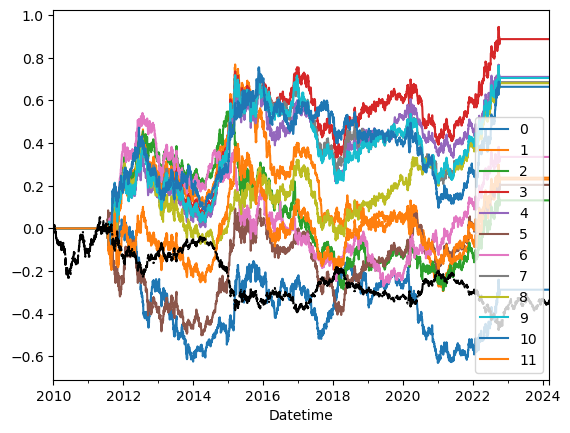

In [397]:
(pred_ds.mul(data.Close.diff().shift(-1),axis=0) - (pred_ds.diff().abs() * 0.00001)).resample('D').sum().cumsum().plot()
data.Close.diff().shift(-1).resample('D').sum().cumsum().plot(color='black',linestyle='-.')

In [398]:
pnl = (pred_ds.mul(data.Close.diff().shift(-1),axis=0) - (pred_ds.diff().abs() * 0.00001)).resample('D').sum()

In [399]:
sr(pnl.mean(axis=1))

0.8840559012155421

In [400]:
sr((bisignals_df.mul(data.Close.diff().shift(-1),axis=0) - (bisignals_df.diff().abs() * 0.00001)).resample('D').sum().mean(axis=1))

-1.0940259974017486

In [401]:
(pred_ds.mul(data.Close.diff().shift(-1),axis=0) - (pred_ds.diff().abs() * 0.00001)).resample('D').sum().apply(sr)

0    -0.495428
1     0.384045
2     0.225630
3     1.439919
4     1.218047
5     0.347918
6     0.595934
7     1.152169
8     1.198166
9     1.160362
10    1.118978
11    0.401989
dtype: float64

In [151]:
p = pd.concat([label,bisignals_df.fillna(0)],axis=1).dropna()
lookback = 9600

# create rolling datasets for each day
rolling = sliding_window_view(p,axis=0, window_shape=lookback+1)
# random forest prediction
#pred = np.apply_over_axis(get_pred, axis=1, arr=rolling)
size = 70000
pred = [get_pred(dataset) for dataset in rolling[:size]]
pred_d = pd.Series(pred,p.index[lookback:lookback+size])

In [106]:
data.Close.diff().shift(-1).index

Index(['2010-01-01 00:00:00', '2010-01-01 01:00:00', '2010-01-01 02:00:00',
       '2010-01-01 03:00:00', '2010-01-01 04:00:00', '2010-01-01 05:00:00',
       '2010-01-01 06:00:00', '2010-01-01 07:00:00', '2010-01-01 08:00:00',
       '2010-01-01 09:00:00',
       ...
       '2024-03-08 15:00:00', '2024-03-08 16:00:00', '2024-03-08 17:00:00',
       '2024-03-08 18:00:00', '2024-03-08 19:00:00', '2024-03-08 20:00:00',
       '2024-03-08 21:00:00', '2024-03-10 21:00:00', '2024-03-10 22:00:00',
       '2024-03-10 23:00:00'],
      dtype='object', name='Datetime', length=88486)

<Axes: xlabel='Datetime'>

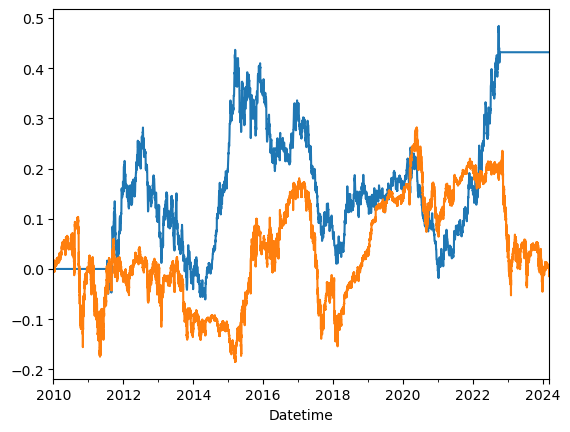

In [402]:
pnl.mean(axis=1).cumsum().plot()
(pnls_df.mean(axis=1)*10).cumsum().plot()

<Axes: xlabel='Datetime'>

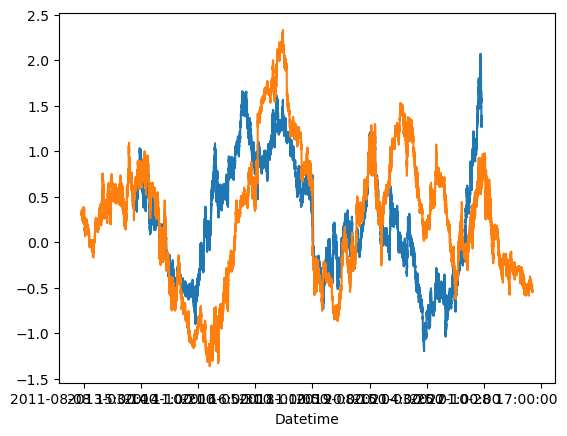

In [70]:
pred_ds.mul(data.Close.diff().shift(-1),axis=0).mean(axis=1).rolling(9600).apply(sr).plot()
pnls_df.mean(axis=1).rolling(9600).apply(sr).plot()

In [ ]:
for i in range(12):
  p = pd.concat([label,bisignals_df.loc[:,port[i]]],axis=1).dropna()
  lookback = 9600

  # create rolling datasets for each day
  rolling = sliding_window_view(p,axis=0, window_shape=lookback+1)
  # random forest prediction
  #pred = np.apply_over_axis(get_pred, axis=1, arr=rolling)
  size = 70000
  pred = [get_pred(dataset,lookback) for dataset in rolling[:size]]
  pred_d = pd.Series(pred,p.index[lookback:lookback+size])
  pred_ds[i] = pred_d

<Axes: xlabel='Datetime'>

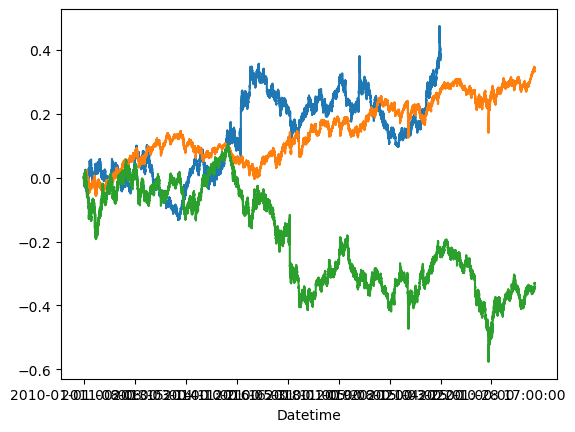

In [36]:
(pred_d/2 * data.Close.diff().shift(-1)).dropna().cumsum().plot()
(pnls_df.loc[:,port[9]].mean(axis=1)).cumsum().plot()
data.Close.diff().shift(-1).cumsum().plot()

In [ ]:
vf = np.vectorize(lambda x: print(x))
vf(rolling[:1])

In [ ]:
vget_pred = np.vectorize(get_pred)
vget_pred(rolling[:2])

In [ ]:
r1[:,-10:]

In [ ]:
p.iloc[2391:2401]

# AggClust

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [ ]:
def plot_dendrogram(model,ax):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix,ax=ax)

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model.fit(pnls_df.corr())

In [ ]:
model.n_clusters_

In [ ]:
fig,ax = plt.subplots(figsize=(40,16))
plot_dendrogram(model,ax=ax)

# HRP

In [ ]:
from pypfopt.hierarchical_portfolio import HRPOpt

In [ ]:
hrp = HRPOpt(pnls_df)

In [ ]:
hrp.optimize()

In [ ]:
hrp.portfolio_performance(risk_free_rate=0,frequency=252*24)